# If you like the notebook please upvote it

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-gasoline-and-diesel-retail-prices-19952021/PET_PRI_GND_DCUS_NUS_W.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Loading the datasets**

In [3]:
data = pd.read_csv("/kaggle/input/us-gasoline-and-diesel-retail-prices-19952021/PET_PRI_GND_DCUS_NUS_W.csv")
data

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


# **Saving a copy of the datasets**

In [4]:
data_copy = data.copy()

# **EDA**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

**lets split the date column**

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

**lets look for a trend in the data**

In [7]:
years = data['Year'].unique()

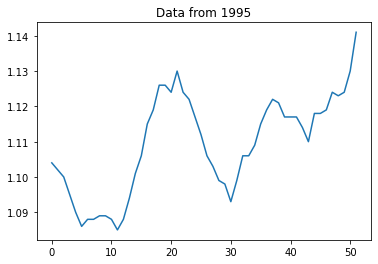

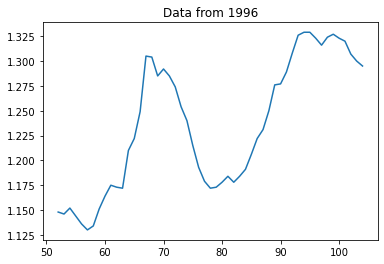

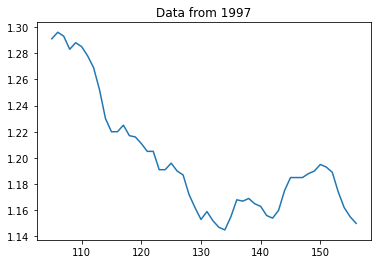

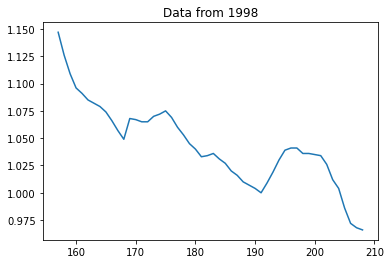

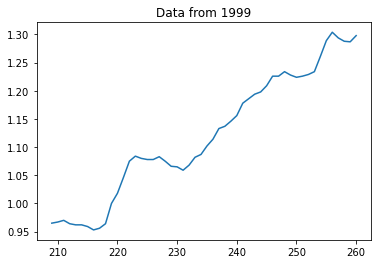

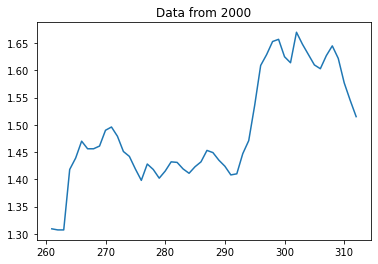

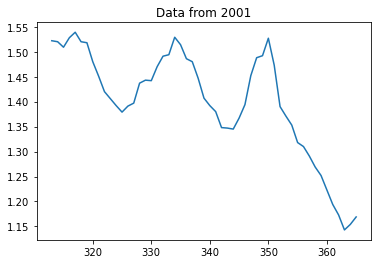

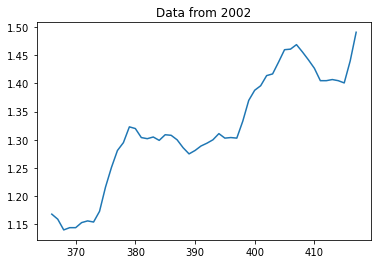

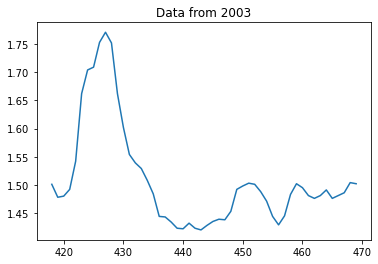

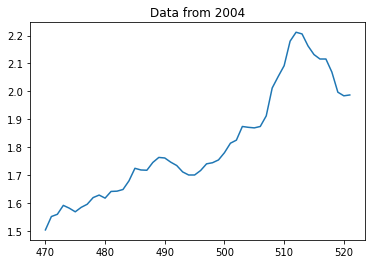

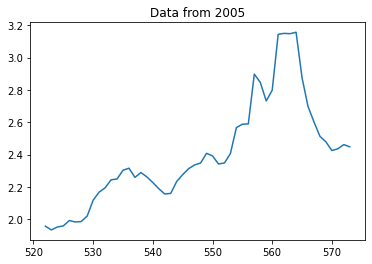

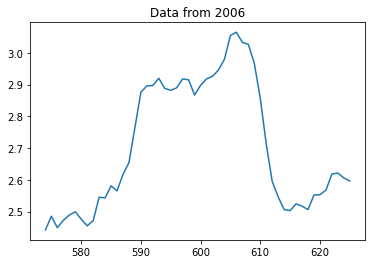

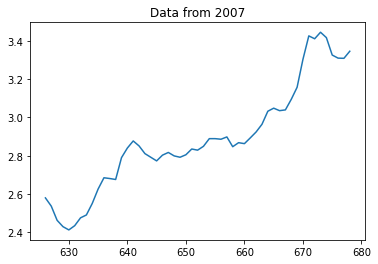

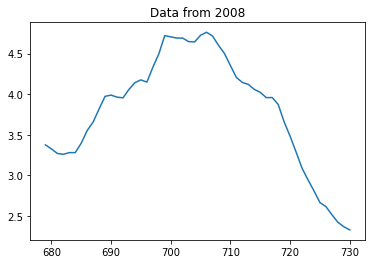

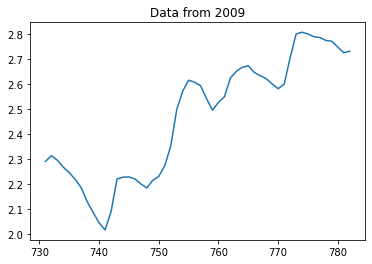

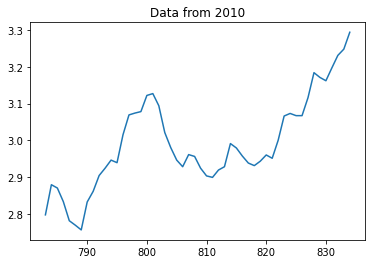

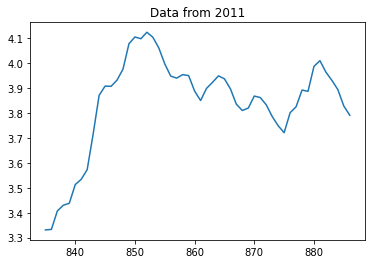

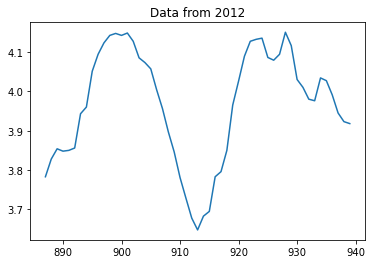

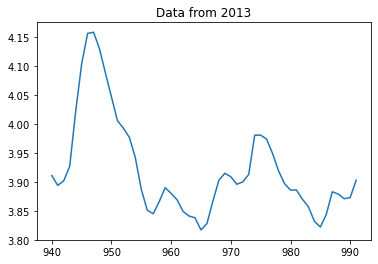

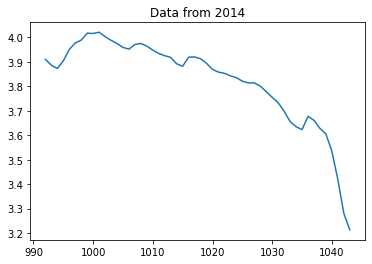

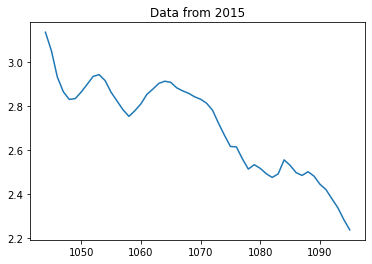

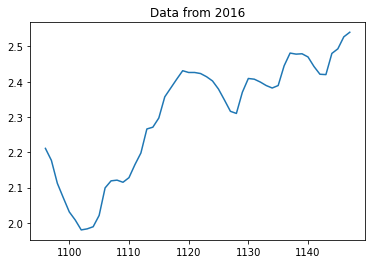

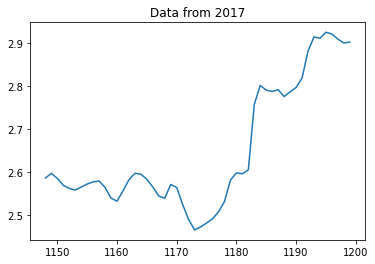

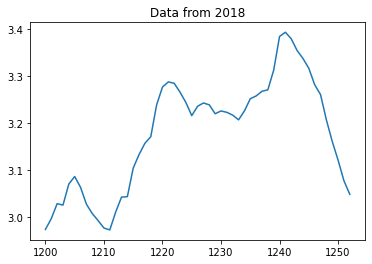

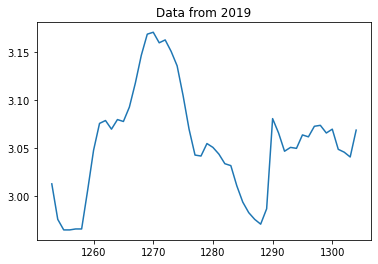

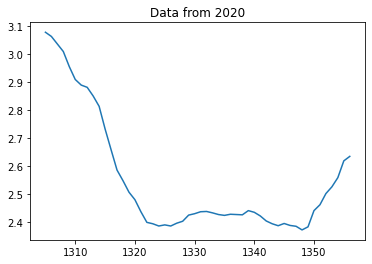

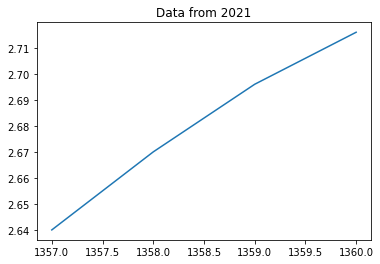

In [8]:
for year in years:
    data_to_plot = data[data['Year']==year].D1
    plt.title(f'Data from {year}')
    plt.plot(data_to_plot)
    plt.show()

**all cols vs D1**

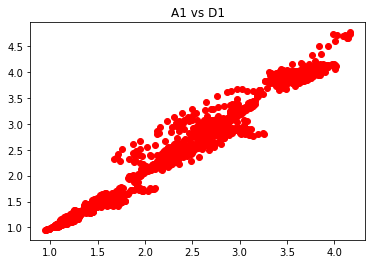

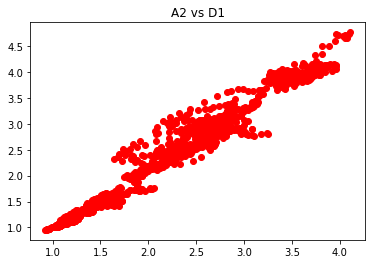

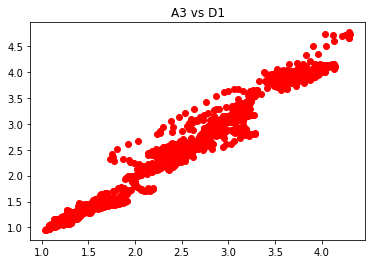

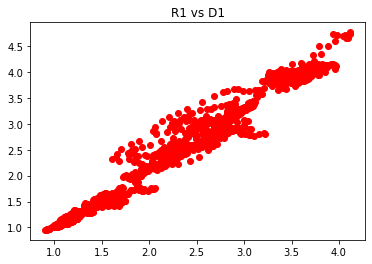

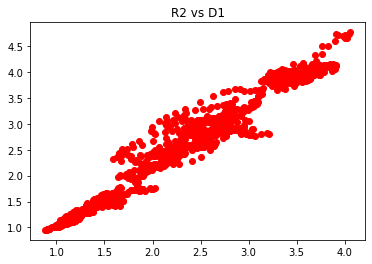

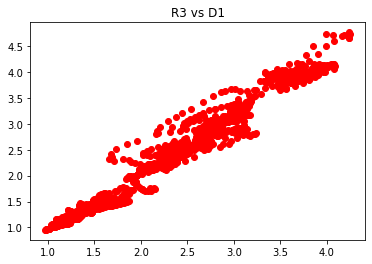

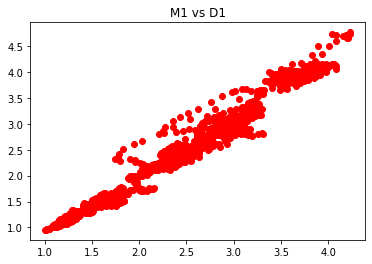

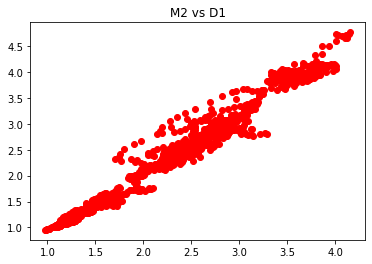

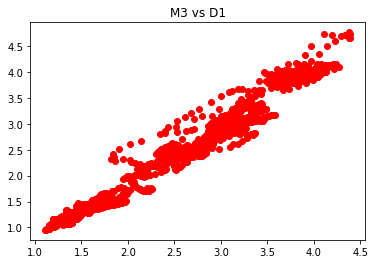

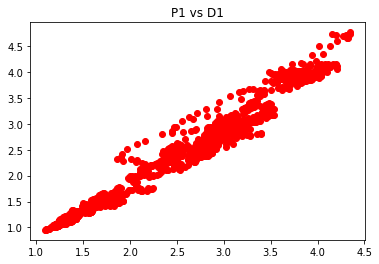

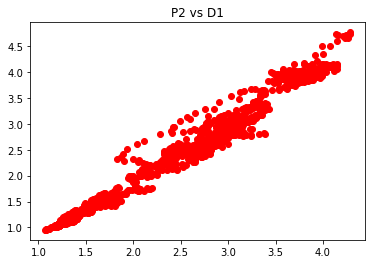

In [9]:
for col in data.columns[1:12]:
    plt.title(f'{col} vs D1')
    plt.scatter(data[col], data['D1'], c='red')
    plt.show()

**distplot of all columns**

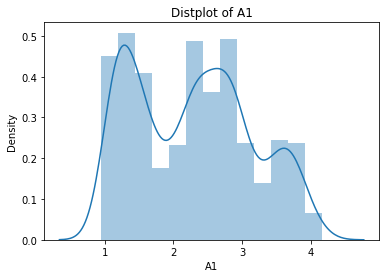

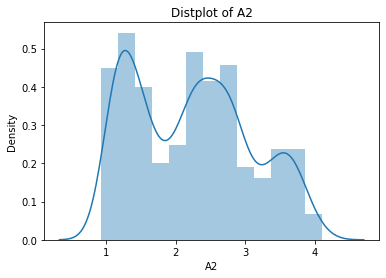

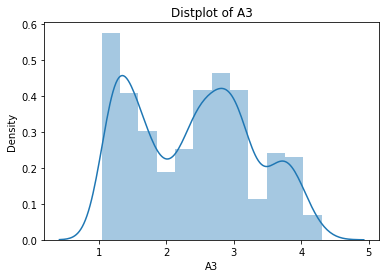

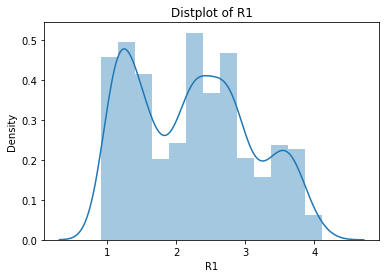

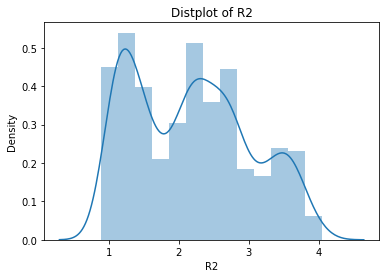

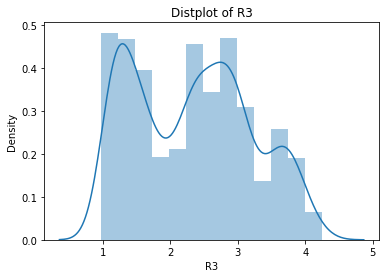

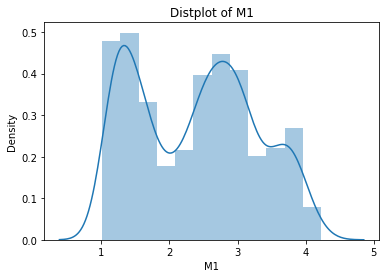

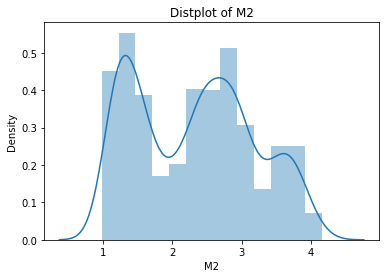

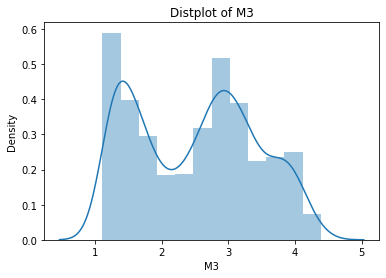

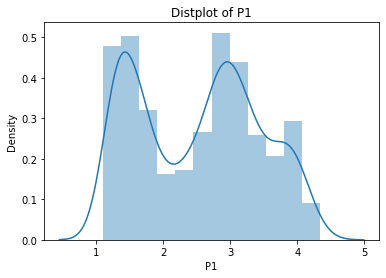

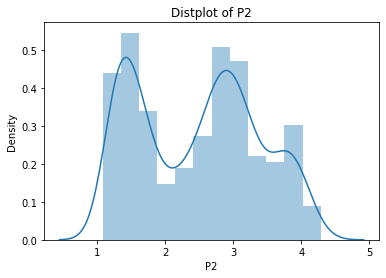

In [10]:
for col in data.columns[1:12]:
    plt.title(f'Distplot of {col}')
    sns.distplot(data[col])
    plt.show()

# **Data processing**

**lets drop the useless columns**

In [11]:
data.drop(['Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)

**null values?**

In [12]:
data.isnull().sum().any()

False

**detecting outliars**

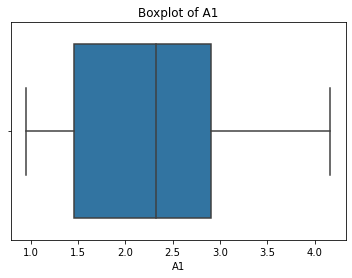

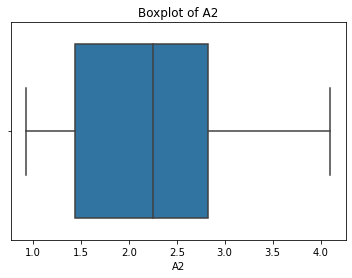

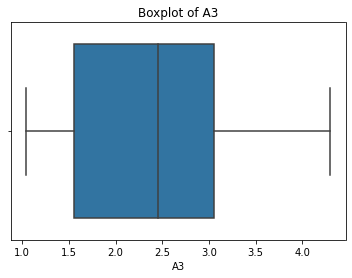

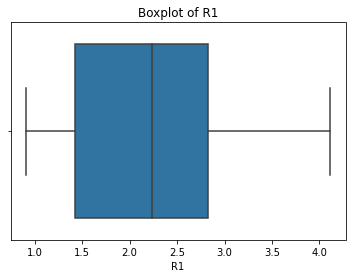

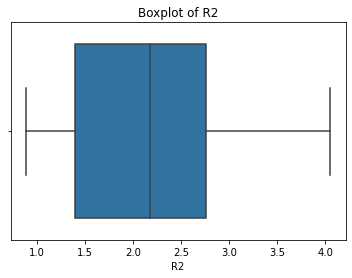

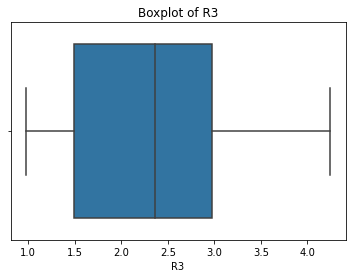

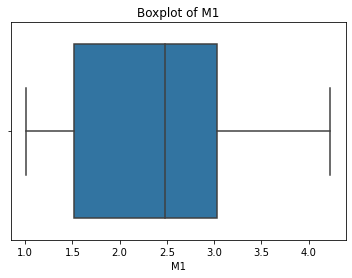

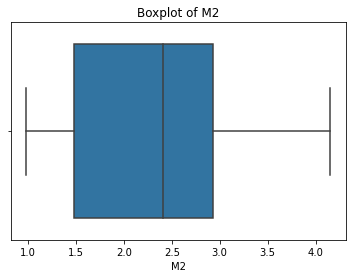

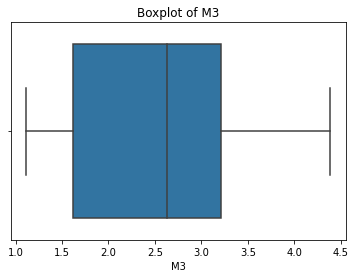

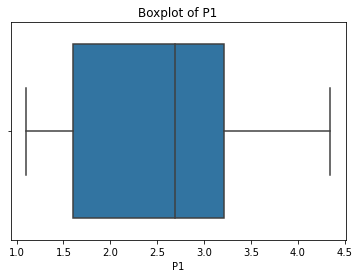

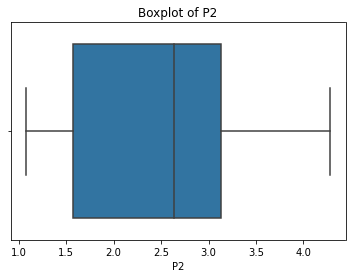

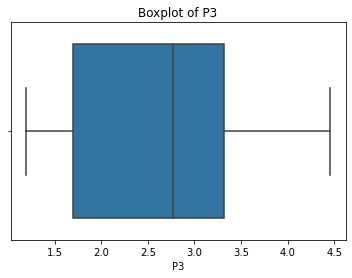

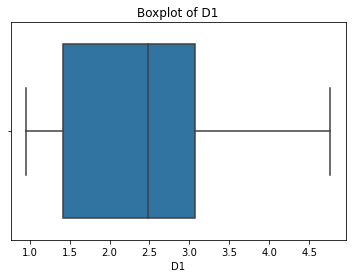

In [13]:
for col in data.columns:
    plt.title(f'Boxplot of {col}')
    sns.boxplot(data[col])
    plt.show()

**there are no outliars in the data**

**Feature Correlation**

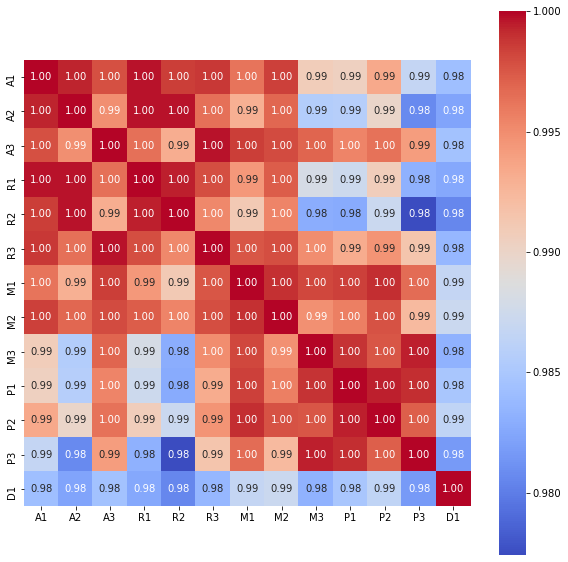

In [14]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.show()

**scaling the data**

In [15]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [16]:
robust = RobustScaler()
minmax = MinMaxScaler()

In [17]:
for col in data.columns:
  data[col] = robust.fit_transform(data[col].values.reshape(-1,1))
  data[col] = minmax.fit_transform(data[col].values.reshape(-1,1))

# SPLITTING DATA INTO TRAINING AND TESTING SETS

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = data.drop('D1', axis=1), data['D1']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# **SPLITTING TRAINING DATA**

In [21]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

# **Model selection**

In [22]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, RidgeCV, ElasticNet

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  error = np.sqrt(mean_squared_error(y_val, pred))
  acc = r2_score(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('Error:', error*100)
  print('\n')
  print('ACC :', acc*100)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [25]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesRegressor)
extratrees

Error: 3.9928217094960257


ACC : 97.89192461712999


Train Score: 100.0


Val Score: 97.89192461712999


Is overfitting: True


Overfitting by: 2.1080753828700125


In [26]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingRegressor)
gradient

Error: 3.916471453483223


ACC : 97.97177453454765


Train Score: 99.23387396440582


Val Score: 97.97177453454765


Is overfitting: True


Overfitting by: 1.2620994298581678


In [27]:
randomforest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestRegressor)
randomforest

Error: 3.9287404045389933


ACC : 97.95904717214611


Train Score: 99.73770020121655


Val Score: 97.95904717214611


Is overfitting: True


Overfitting by: 1.7786530290704405


In [28]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostRegressor)
ada

Error: 4.3302121813686245


ACC : 97.52061108479604


Train Score: 97.68438353115091


Val Score: 97.52061108479604


Is overfitting: True


Overfitting by: 0.16377244635486932


In [29]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBRegressor)
xgb

Error: 4.239114434631493


ACC : 97.62383507226424


Train Score: 99.98135296090676


Val Score: 97.62383507226424


Is overfitting: True


Overfitting by: 2.357517888642519


In [30]:
catboost = model_selection(x_train_, x_val, y_train_, y_val, CatBoostRegressor)
catboost

Learning rate set to 0.038075
0:	learn: 0.2515752	total: 58.3ms	remaining: 58.2s
1:	learn: 0.2428151	total: 62.2ms	remaining: 31s
2:	learn: 0.2342882	total: 65.2ms	remaining: 21.7s
3:	learn: 0.2262698	total: 68ms	remaining: 16.9s
4:	learn: 0.2186211	total: 70.7ms	remaining: 14.1s
5:	learn: 0.2111320	total: 73.1ms	remaining: 12.1s
6:	learn: 0.2039855	total: 76ms	remaining: 10.8s
7:	learn: 0.1969422	total: 79.2ms	remaining: 9.81s
8:	learn: 0.1903152	total: 82.2ms	remaining: 9.05s
9:	learn: 0.1837143	total: 84.9ms	remaining: 8.4s
10:	learn: 0.1777589	total: 87.5ms	remaining: 7.87s
11:	learn: 0.1718359	total: 89.8ms	remaining: 7.4s
12:	learn: 0.1659989	total: 92.7ms	remaining: 7.04s
13:	learn: 0.1604708	total: 96.2ms	remaining: 6.78s
14:	learn: 0.1550976	total: 99.7ms	remaining: 6.55s
15:	learn: 0.1500393	total: 103ms	remaining: 6.35s
16:	learn: 0.1452246	total: 107ms	remaining: 6.17s
17:	learn: 0.1404689	total: 110ms	remaining: 5.98s
18:	learn: 0.1362108	total: 112ms	remaining: 5.78s
19:	

In [31]:
sgd = model_selection(x_train_, x_val, y_train_, y_val, SGDRegressor)
sgd

Error: 4.4303706026260254


ACC : 97.40458736938776


Train Score: 97.11576148414821


Val Score: 97.40458736938776


Is overfitting: False


Overfitting by: -0.28882588523954666


In [32]:
linear = model_selection(x_train_, x_val, y_train_, y_val, LinearRegression)
linear

Error: 4.0763249187254065


ACC : 97.80282884938646


Train Score: 97.58546347914177


Val Score: 97.80282884938646


Is overfitting: False


Overfitting by: -0.2173653702446927


In [33]:
lasso = model_selection(x_train_, x_val, y_train_, y_val, Lasso)
lasso

Error: 27.542806996284884


ACC : -0.30964608394239423


Train Score: 0.0


Val Score: -0.30964608394239423


Is overfitting: True


Overfitting by: 0.30964608394239423


In [34]:
net = model_selection(x_train_, x_val, y_train_, y_val, ElasticNet)
net

Error: 27.542806996284884


ACC : -0.30964608394239423


Train Score: 0.0


Val Score: -0.30964608394239423


Is overfitting: True


Overfitting by: 0.30964608394239423


In [35]:
ridge = model_selection(x_train_, x_val, y_train_, y_val, RidgeCV)
ridge

Error: 4.286532325845098


ACC : 97.57037914453495


Train Score: 97.4053001637614


Val Score: 97.57037914453495


Is overfitting: False


Overfitting by: -0.16507898077355776


**I will use Linear Regression**

# Model building and training

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predictions

In [37]:
pred = model.predict(x_test)
pred

array([ 0.05309793,  0.80850596,  0.01212162,  0.54925465,  0.0209011 ,
        0.66363552,  0.81284232,  0.04882402,  0.54632304,  0.0100688 ,
        0.00691788,  0.28116626,  0.40450033,  0.28350889,  0.61398964,
        0.51237098,  0.79298506,  0.24827825,  0.70302023,  0.04656476,
        0.63183713,  0.13948934,  0.24065823,  0.12305614,  0.08716166,
        0.06324475,  0.82615858,  0.7263891 ,  0.73257712,  0.10069426,
        0.26920724,  0.1660294 ,  0.73277224,  0.43301614,  0.02257637,
        0.52834124,  0.11067666,  0.13668655,  0.68738929,  0.52998409,
        0.10453591,  0.09613287,  0.28576462,  0.45194477,  0.35128297,
        0.58439047,  0.13335691,  0.07980821,  0.06094377,  0.4361395 ,
        0.16273431,  0.12162693,  0.51953373,  0.17136405,  0.44706037,
        0.06103791,  0.04280332,  0.09236841,  0.04241835,  0.01841936,
        0.56296325,  0.01564279,  0.48349134,  0.23177563,  0.13223505,
        0.78384843,  0.06381478,  0.16197958,  0.26061277,  0.26

# Metric check

**mean squared error**

In [38]:
error = np.sqrt(mean_squared_error(y_test, pred))
error*100

3.6760634547067785

**r2 score**

In [39]:
acc = r2_score(y_test, pred)
acc*100

97.90279049041682

**overfitting rate**

In [40]:
overfitting_by = model.score(x_train, y_train)*100 - model.score(x_test, y_test)*100
overfitting_by

-0.26331253160329027

**The model is not overfitting at all**